In [1]:
from keras.applications.vgg16 import VGG16
# Load the model
model = VGG16() # Trained CNN
# 2 things to check during training
# 1 Filter (kernel)
# 2 Feature map when test the filter on new image(output from filter)

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [2]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

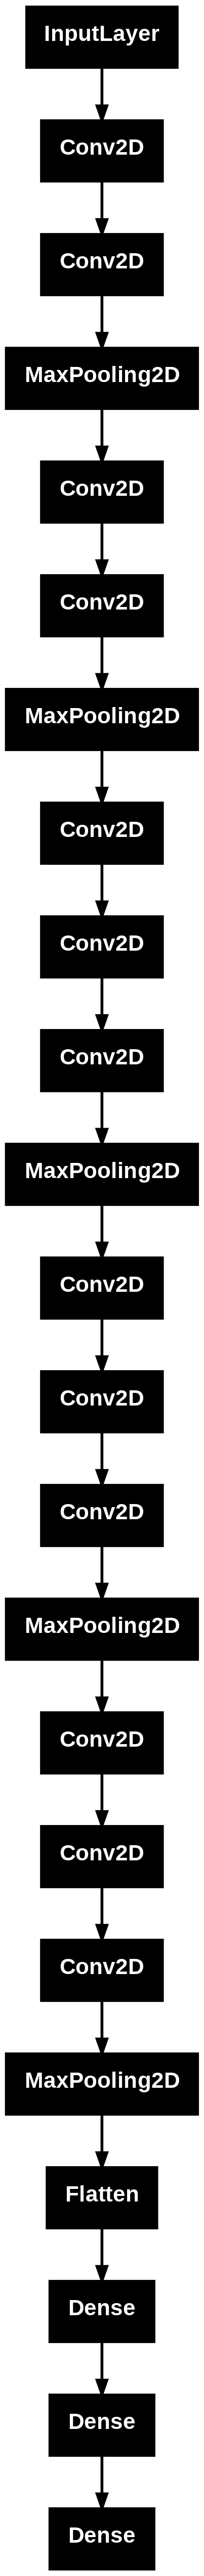

In [3]:
from keras.utils import plot_model
plot_model(model)

In [4]:
# Extracting filters(Kerel) --> conv_layer
for i in range(len(model.layers)):
  # check for convolutional layer
  if 'conv' not in model.layers[i].name:
    continue
  # get filter weights
  filters,biases = model.layers[i].get_weights()
  print("layer number",i,model.layers[i].name,filters.shape)

layer number 1 block1_conv1 (3, 3, 3, 64)
layer number 2 block1_conv2 (3, 3, 64, 64)
layer number 4 block2_conv1 (3, 3, 64, 128)
layer number 5 block2_conv2 (3, 3, 128, 128)
layer number 7 block3_conv1 (3, 3, 128, 256)
layer number 8 block3_conv2 (3, 3, 256, 256)
layer number 9 block3_conv3 (3, 3, 256, 256)
layer number 11 block4_conv1 (3, 3, 256, 512)
layer number 12 block4_conv2 (3, 3, 512, 512)
layer number 13 block4_conv3 (3, 3, 512, 512)
layer number 15 block5_conv1 (3, 3, 512, 512)
layer number 16 block5_conv2 (3, 3, 512, 512)
layer number 17 block5_conv3 (3, 3, 512, 512)


In [10]:
# retrieve weights from the second layer
filters,bias = model.layers[1].get_weights()

In [12]:
# normalize filter values to 0-1 so we can visualise them
f_min,f_max = filters.min(),filters.max()
filters = (filters-f_min)/(f_max-f_min)

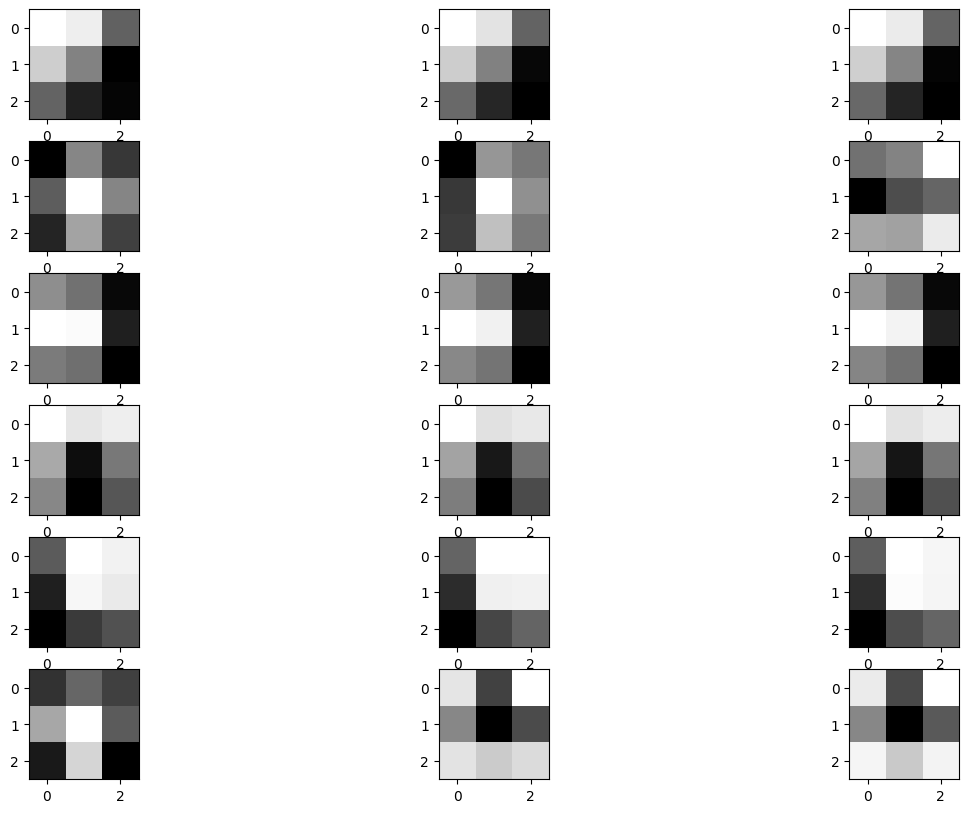

In [17]:
from matplotlib import pyplot
n_filters = 6
ix = 1
fig = pyplot.figure(figsize = (15,10))
for i in range(n_filters):
  # get the filters
  f = filters[:,:,:,i]
  for j in range(3):
  # subplots for 6 filters and 3 channels
    pyplot.subplot(n_filters,3,ix)
    pyplot.imshow(f[:,:,j],cmap = 'gray')
    ix +=1
# plot the filters
pyplot.show()

In [25]:
# Convolving the filter on new image and testing output
# creating subset of VGG Model
from tensorflow.keras import Model
model = Model(inputs = model.inputs,outputs = model.layers[1].output)
# input of VGG 16 input and output is VGG16 1st layer output

In [27]:
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.applications.resnet import preprocess_input
# What is a preprocess_input function?
#The preprocess_input function is meant to adequate your image to the format the model requires.
#Some models use images with values ranging from 0 to 1. Others from -1 to +1.
# Others use the "caffe" style, that is not normalized, but is centered. From the source code,
# Resnet is using the caffe style.
from numpy import expand_dims
image = load_img('/content/Virat Kohli.webp',target_size =(224,224))
#convert the image into array
image = img_to_array(image)
# expand dimensions so that it represents a single sample
image = expand_dims(image,axis = 0)
image = preprocess_input(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


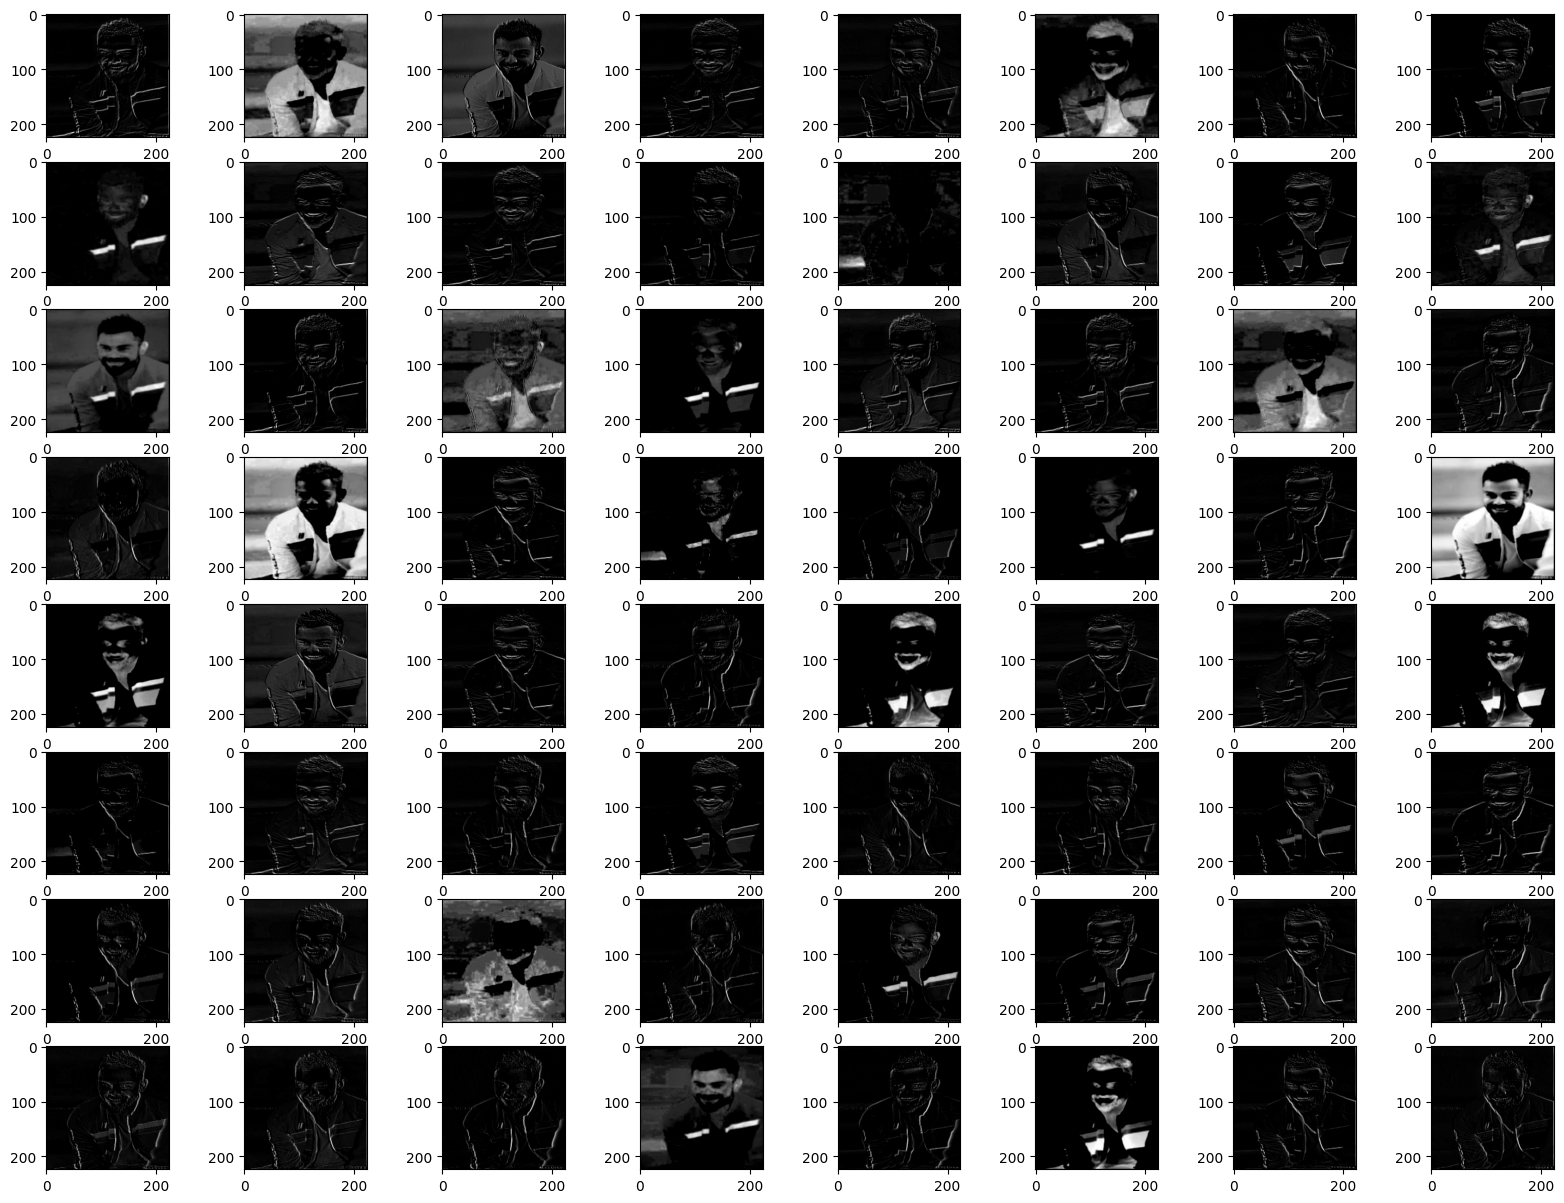

In [28]:
# calculating feature map
features = model.predict(image)
fig = pyplot.figure(figsize = (20,15))
for i in range(1,features.shape[3]+1):
  pyplot.subplot(8,8,i)
  pyplot.imshow(features[0,:,:,i-1],cmap='gray')
pyplot.show()

In [29]:
# trying to check feature map after every layer
# Creating and Training new model
model2 = VGG16()
layer_index = [2,5,7,9,13,17]
outputs = [model2.layers[i].output for i in layer_index]
#Testing the model with new image
model3 = Model(inputs = model2.inputs,outputs = outputs)

In [31]:
feature_map = model3.predict(image)
for i ,fmap in zip(layer_index,feature_map):
  fig = pyplot.figure(figsize = (20,15))
  fig.suptitle('Layer_{}'.format(i),fontsize = 20)
  for i in range(1,features.shape[3]+1):
    pyplot.subplot(8,8,i)
    pyplot.imshow(fmap[0,:,:,i-1],cmap ='gray')
pyplot.show()

Output hidden; open in https://colab.research.google.com to view.